<img src="https://www.itzem.com/wp-content/uploads/2019/06/Used-Cars.jpg" style="float: left; margin: 20px;height: 350px; width:950px">


# Quality Motors

-------

### Data Analysis and Prediction with Craigslist Used Cars Data



Quality Motors is a medium size of a used card dealer store. To maintain our reputation  and expand our clients base (not only from local), we have to have a good used cars selection at a good price point to be stand out in the market. Therefore, a good market price prediction will provide a good guidance for sales team.  That being said, we also can identify some potential good deals from third party such as private party.


How to increase sales revenue by 10% by utilizing market price prediction model to identify good price point in order to generate more online sales in coming six months?
Data Analysis goals:
- Use statistical analysis to identify the used cars selling trend.
- Use visualization to identify the important variables of prediction used car market price
- Create model to prediction the market price



This project uses the [Used Cars Dataset Vehicles listings from Craigslist.org](https://www.kaggle.com/austinreese/craigslist-carstrucks-data).

-------


<img src="https://www.pngkey.com/png/full/366-3662798_auto-car-checklist-infographic.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

# Dataset

### 1. Introducing the Original Dataset Fields ## 

I've generated a simple table on what each feature can be described and its type from dataset

| Variable Name |  Type   |Description|
| :----------:  | :-----: |:------------:|
|Price|Integer| The Vehicle's listed price in dollars|
|Id|Integer| The Vehicle's unique identification number|
|URL|String| The url of the listing on Craiglist|
|Region|String| Region where the Vehicle locate|
|Region_URL|String| Craiglist's Region URL|
|Year|Float| Vehicle manufacturing year|
|Manufacturer|String| Vehicle manufacturer|
|Model|String| Vehicle model|
|Condition|String| Vehicle condition per seller|
|Cylinders|String| Number of cylinders of the vehicle|
|Fuel|String| Vehicle fuel type|
|Odometer|Float| Mileage of the vehicle when posting the listing|
|Title_Status|String| Status of the vehicle|
|Image_URL|String| URL of the vehicle images|
|Description|String| Details description about the vehicle per seller|
|County|Float| County where the Vehicle locate|
|State|String| State where the vehicle locate|
|Latitude|Float| Latitude where vehicle locate|
|Longitude|Float| Longitude where vehicle locate|

### 2. Data Loading and Cleaning

In [1]:
# I will need to import panda, numpy, matplotlip and seasborn to do the DS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import statsmodels.api as sm
from scipy import stats


%matplotlib inline

In [2]:
# identify the path of files
cars =pd.read_csv('C:/Users/hokam/OneDrive/Desktop/Capstone Project2/vehicles.csv')

In [3]:
cars.shape

(539759, 25)

In [4]:
cars.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [5]:
cars.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7088746062,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,10299,2012.0,acura,tl,NaN,NaN,...,NaN,NaN,other,blue,https://images.craigslist.org/01414_3LIXs9EO33...,2012 Acura TL Base 4dr Sedan Offered by: B...,NaN,nc,35.7636,-78.7443
1,7088745301,https://greensboro.craigslist.org/ctd/d/bmw-3-...,greensboro,https://greensboro.craigslist.org,0,2011.0,bmw,335,NaN,6 cylinders,...,rwd,NaN,convertible,blue,https://images.craigslist.org/00S0S_1kTatLGLxB...,BMW 3 Series 335i Convertible Navigation Dakot...,NaN,nc,NaN,NaN
2,7088744126,https://greensboro.craigslist.org/cto/d/greens...,greensboro,https://greensboro.craigslist.org,9500,2011.0,jaguar,xf,excellent,NaN,...,NaN,NaN,NaN,blue,https://images.craigslist.org/00505_f22HGItCRp...,2011 jaguar XF premium - estate sale. Retired ...,NaN,nc,36.1032,-79.8794
3,7088743681,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,3995,2004.0,honda,element,NaN,NaN,...,fwd,NaN,SUV,orange,https://images.craigslist.org/00E0E_eAUnhFF86M...,2004 Honda Element LX 4dr SUV Offered by: ...,NaN,nc,35.7636,-78.7443
4,7074612539,https://lincoln.craigslist.org/ctd/d/gretna-20...,lincoln,https://lincoln.craigslist.org,41988,2016.0,chevrolet,silverado k2500hd,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00S0S_8msT7RQquO...,"Shop Indoors, Heated Showroom!!!www.gretnaauto...",NaN,ne,41.1345,-96.2458


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539759 entries, 0 to 539758
Data columns (total 25 columns):
id              539759 non-null int64
url             539759 non-null object
region          539759 non-null object
region_url      539759 non-null object
price           539759 non-null int64
year            538772 non-null float64
manufacturer    516175 non-null object
model           531746 non-null object
condition       303707 non-null object
cylinders       321264 non-null object
fuel            536366 non-null object
odometer        440783 non-null float64
title_status    536819 non-null object
transmission    535786 non-null object
vin             315349 non-null object
drive           383987 non-null object
size            168550 non-null object
type            392290 non-null object
paint_color     365520 non-null object
image_url       539740 non-null object
description     539738 non-null object
county          0 non-null float64
state           539759 non-null obj

In [7]:
cars.drop(columns=['url','image_url','region_url','vin','county','description','region','model','lat','long'],inplace=True)

In [8]:
cars.isnull().sum()

id                   0
price                0
year               987
manufacturer     23584
condition       236052
cylinders       218495
fuel              3393
odometer         98976
title_status      2940
transmission      3973
drive           155772
size            371209
type            147469
paint_color     174239
state                0
dtype: int64

In [9]:
new_columns_dic ={'id': 'ID',
                  'price': 'Price',
                  'year': 'Year',
                  'manufacturer': 'Manufacturer',
                  'condition':'Condition',
                  'cylinders':'Cyl',
                  'fuel': 'Fuel',
                  'odometer': 'Odometer',
                 'title_status':'Title_status',
                 'transmission':'Transmission',
                 'drive':'Drive',
                 'size':'Size',
                 'type':'Type',
                 'paint_color':'Paint_color',
                 'state':'State'}
cars.rename(columns=new_columns_dic,inplace=True)

### 3. Removing 0 values rows

In [10]:
# checking if there are some column is non null but the value =0
for i in cars.columns:
    if cars[i][cars[i]==0].count()>0:
        print('There are %d zero values in %s' %(cars[i][cars[i]==0].count(),i))

There are 44689 zero values in Price
There are 1 zero values in Year
There are 2376 zero values in Odometer


In [11]:
# For those non null value but there are 0 value, i will assume it as input error, thus, i will drop those
cars = cars.loc[~((cars['Year']==0)| (cars['Price'] ==0)|(cars['Odometer'] ==0))]

In [12]:
for i in cars.columns:
    if cars[i][cars[i]==0].count()>0:
        print('There are %d zero values in %s' %(cars[i][cars[i]==0].count(),i))

In [13]:
cars.isnull().sum()

ID                   0
Price                0
Year               925
Manufacturer     20936
Condition       205742
Cyl             196123
Fuel              3095
Odometer         88731
Title_status      2607
Transmission      3376
Drive           142502
Size            337299
Type            136220
Paint_color     157194
State                0
dtype: int64

### 4. Separate Features into Categorical and Numerical Features

In [14]:
# Separate features into categorical and numerical feature
categorical_feature = []
numerical_feature = []

def check_dtypes(df):
    #Looping 
    for col in df.columns.tolist():
        if df[col].dtype=='object':
            categorical_feature.append(col)
        else:
            numerical_feature.append(col)
    
    #make dataframe that have two feature, that is categorical and numerical feature
    categorical = pd.Series(categorical_feature, name='Categorical Feature')
    numerical = pd.Series(numerical_feature, name='Numerical Feature')
    df_dtypes = pd.concat([categorical,numerical], axis=1)
    
    return df_dtypes

In [15]:
check_dtypes(cars)

,Categorical Feature,Numerical Feature
0,Manufacturer,ID
1,Condition,Price
2,Cyl,Year
3,Fuel,Odometer
4,Title_status,NaN
5,Transmission,NaN
6,Drive,NaN
7,Size,NaN
8,Type,NaN
9,Paint_color,NaN


### 5. Filling Missing Values

In [16]:
def fill_missing(df, varlist = None , vartype = None ):
    # filling numerical data with median 
    if vartype == 'numerical' :
        for col in varlist:
            df[col] = df[col].fillna(df[col].mean())
    
    # filling categorical data with mode  
    if vartype == 'categorical' :
        for col in varlist:
            df[col] = df[col].fillna(df[col].mode().iloc[0])

In [17]:
# filling miss value on the numerical columns with their median
fill_missing(cars, numerical_feature, 'numerical')

In [18]:
# filling miss value on the categorical column with their mode
fill_missing(cars, categorical_feature,'categorical')

In [19]:
cars.isnull().sum()

ID              0
Price           0
Year            0
Manufacturer    0
Condition       0
Cyl             0
Fuel            0
Odometer        0
Title_status    0
Transmission    0
Drive           0
Size            0
Type            0
Paint_color     0
State           0
dtype: int64

In [20]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493684 entries, 0 to 539758
Data columns (total 15 columns):
ID              493684 non-null int64
Price           493684 non-null int64
Year            493684 non-null float64
Manufacturer    493684 non-null object
Condition       493684 non-null object
Cyl             493684 non-null object
Fuel            493684 non-null object
Odometer        493684 non-null float64
Title_status    493684 non-null object
Transmission    493684 non-null object
Drive           493684 non-null object
Size            493684 non-null object
Type            493684 non-null object
Paint_color     493684 non-null object
State           493684 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 60.3+ MB


In [21]:
# rechecking 0 values to ensuer nothinng went wrong during filling up the values
for i in cars.columns:
    if cars[i][cars[i]==0].count()>0:
        print('There are %d zero values in %s' %(cars[i][cars[i]==0].count(),i))

In [22]:
# reindex rows
cars.reset_index(drop=True, inplace=True)
cars['Year'] = cars['Year'].apply(lambda x: int(x))
cars['Odometer'] = cars['Odometer'].apply(lambda x : int(x))
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493684 entries, 0 to 493683
Data columns (total 15 columns):
ID              493684 non-null int64
Price           493684 non-null int64
Year            493684 non-null int64
Manufacturer    493684 non-null object
Condition       493684 non-null object
Cyl             493684 non-null object
Fuel            493684 non-null object
Odometer        493684 non-null int64
Title_status    493684 non-null object
Transmission    493684 non-null object
Drive           493684 non-null object
Size            493684 non-null object
Type            493684 non-null object
Paint_color     493684 non-null object
State           493684 non-null object
dtypes: int64(4), object(11)
memory usage: 56.5+ MB


### 6. Removing Data which are fit our analysis goal

In [23]:
cars.describe()

,ID,Price,Year,Odometer
count,4.936840e+05,4.936840e+05,493684.000000,4.936840e+05
mean,7.087631e+09,2.136132e+05,2009.568100,1.030136e+05
std,5.218418e+06,2.308993e+07,8.793541,1.654980e+05
min,7.065765e+09,1.000000e+00,1900.000000,1.000000e+00
25%,7.084287e+09,5.499000e+03,2006.000000,6.045275e+04
50%,7.088998e+09,1.080000e+04,2011.000000,1.030130e+05
75%,7.092091e+09,1.890000e+04,2015.000000,1.292232e+05
max,7.093537e+09,4.294967e+09,2021.000000,6.480922e+07


In [24]:
# we can see that price min is $ 1 which isn't realistic, so I will set the min price of listing to be at least $1000
cars = cars[cars['Price']. between(999.99,39000)]

# As I can see that there are some listings' vehicle year are in 2021 and with more than 100K milege
# Since it is unlikely to be true, I will drop those columns
cars = cars[cars['Year'] <=2020] 

# I am not intested in auto parts, so I will drop these rows
indexNames = cars[cars['Title_status'] == 'parts only'].index
cars.drop(indexNames, inplace=True)

In [25]:
# I will add a column of age of vehicle and seems we are used car dealer,
# vintage cars aren't our market, so we decide to look at the cars between 0~30 years old.
cars["Age"] = cars.Year.apply(lambda x: int(2020-x))
cars = cars[(cars.Age >= 0) & (cars.Age <= 30)]


In [26]:
cars.shape

(451869, 16)

### 7. Reclassify columns: State, Manufacturer and Color

In [27]:
# add a column to classify states in to different part of USA
# thanks to https://www.path2usa.com/us-map-with-states-and-their-abbreviations
# thanks to https://stackoverflow.com/questions/52529293/how-to-reclassify-pandas-dataframe-column
def clean_state(row):
    Northeast = ['me','vt','nh','ma','ri','ct','nj','de','md','pa','ny']
    West = ['wa','or','id','ut','nv','ca','ak','hi']       
    South = ['wv','va','nc','sc','ga','fl','al','ms','la','ar','tn','ky']
    Midwest = ['mn','wi','mi','oh','in','il','mo','ia']
    Southwest = ['az','nm','tx','ok','dc']
    Central = ['mt','wy','co','nd','sd','ne','ks']
    
    if row.State in Northeast:
        return 'Northeast'   
    if row.State in West:
        return 'West'
    if row.State in South:
        return 'South'   
    if row.State in Midwest:
        return 'Midwest'  
    if row.State in Southwest:
        return 'Southwest'   
    if row.State in Central:
        return 'Central'  
    return row.State

cars['State_Classify'] = cars.apply(clean_state,axis=1)

In [28]:
# add a column to classify Manufacturer into Luxury and Regular cars
def clean_manufacturer(row):
    
    Luxury_cars = ['acura','jaguar','bmw','lexus','volvo','mercedes-benz','cadillac','audi', 'infiniti','tesla',
                   'alfa-romeo', 'aston-martin','land rover', 'rover','porche','ferrari']
    Regular_cars = ['honda', 'kia', 'chevrolet', 'toyota','nissan','ford', 'volkswagen',
                    'gmc', 'subaru', 'ram', 'dodge', 'buick', 'jeep', 'hyundai', 'pontiac', 'mini', 'chrysler',
                    'mazda', 'lincoln', 'mercury', 'fiat', 'harley-davidson', 'saturn','mitsubishi', 'datsun']       
    
    if row.Manufacturer in Luxury_cars:
        return 'Luxury_cars'   
    if row.Manufacturer in Regular_cars:
        return 'Regular_cars'

    return row.Manufacturer

cars['Brand_Classify'] = cars.apply(clean_manufacturer,axis=1)

In [29]:
cars.Paint_color.unique()

array(['blue', 'orange', 'white', 'black', 'silver', 'red', 'grey',
       'green', 'custom', 'brown', 'yellow', 'purple'], dtype=object)

In [30]:
# add a column to classify Paint color into Standard, Special and Custom Color
def clean_color(row):
    Standard_color = ['white', 'black', 'silver', 'red', 'grey']
       
    Special_color =  ['blue', 'orange','green','brown', 'yellow', 'purple'] 
    Custom_color = ['custom']
    
    if row.Paint_color in Standard_color:
        return 'Standard_color'   
    if row.Paint_color in Special_color:
        return 'Special_color'
    if row.Paint_color in Custom_color:
        return 'Custom_color'  

cars['Color_Classify'] = cars.apply(clean_color,axis=1)

<img src="https://www.pngkey.com/png/full/366-3662798_auto-car-checklist-infographic.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

# Removing Outliers by IQR 

In [31]:
# Sort out the outliers per Year and Odo

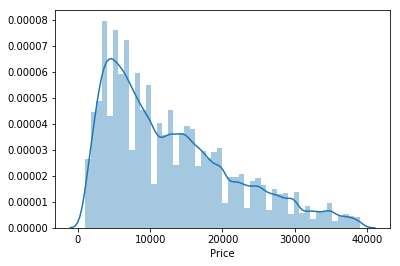

In [32]:
# First, let's take a look at our target variable price.
#As we can see that our price is hihgly skewed to the right, so we need to remove outliers or extreme outliers to make our data more predictable
sns.distplot(cars['Price']);

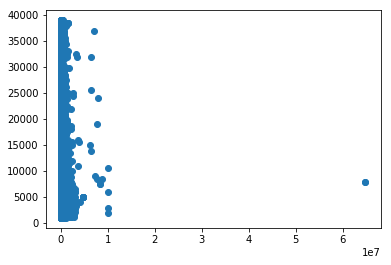

In [33]:
plt.scatter(cars['Odometer'], cars['Price']);

In [34]:
Q1 = cars[['Price','Odometer']].quantile(0.25); print(Q1)
Q3 = cars[['Price','Odometer']].quantile(0.75); print(Q3)
IQR = Q3-Q1;print(IQR)

Price        5800.0
Odometer    63712.0
Name: 0.25, dtype: float64
Price        17997.0
Odometer    132346.0
Name: 0.75, dtype: float64
Price       12197.0
Odometer    68634.0
dtype: float64


In [35]:
#remove  outlier which are 1.5 *IQR
lower_bound = Q1 -(1.5 * IQR)
upper_bound = Q3 +(1.5 * IQR)
cars_true = cars[~((cars < lower_bound) |(cars > upper_bound)).any(axis=1)]

In [36]:
cars_true.shape

(437347, 19)

In [37]:
cars_true.reset_index(drop=True, inplace=True)

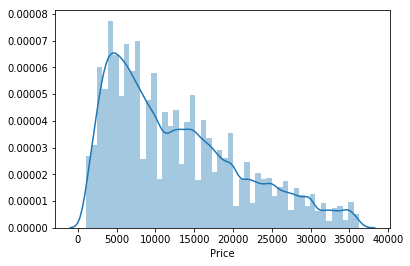

In [38]:
sns.distplot(cars_true['Price'])

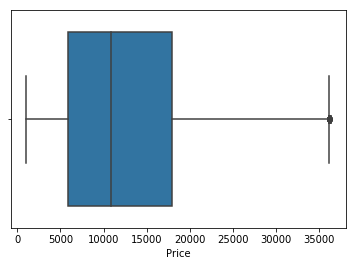

In [39]:
sns.boxplot(cars_true['Price'])

<img src="https://www.pngkey.com/png/full/366-3662798_auto-car-checklist-infographic.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

# Data Visualization 

####  A. Numerical Featuers 
#### - Odometer   

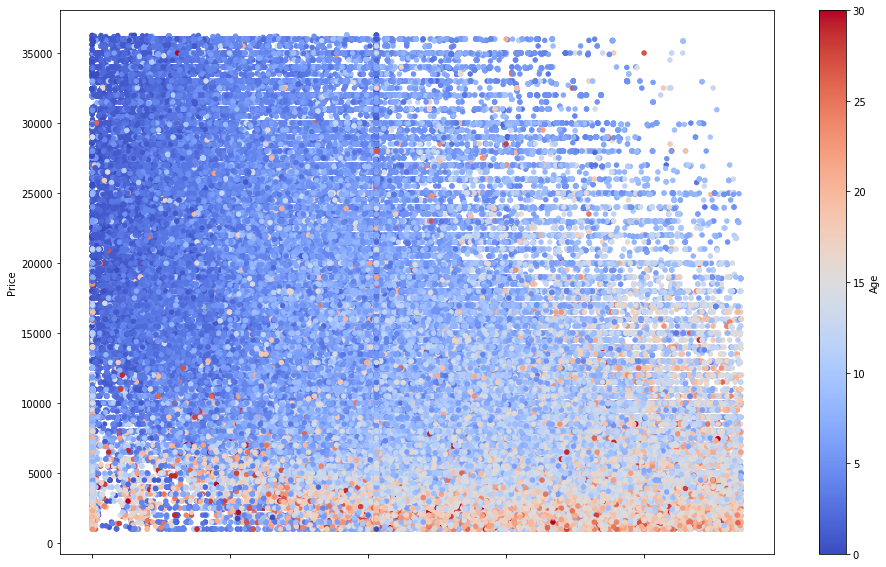

In [40]:
cars_true.plot.scatter(x="Odometer", y="Price", c='Age', colormap="coolwarm", figsize=(16,10))
plt.show()

#### Age vs Price

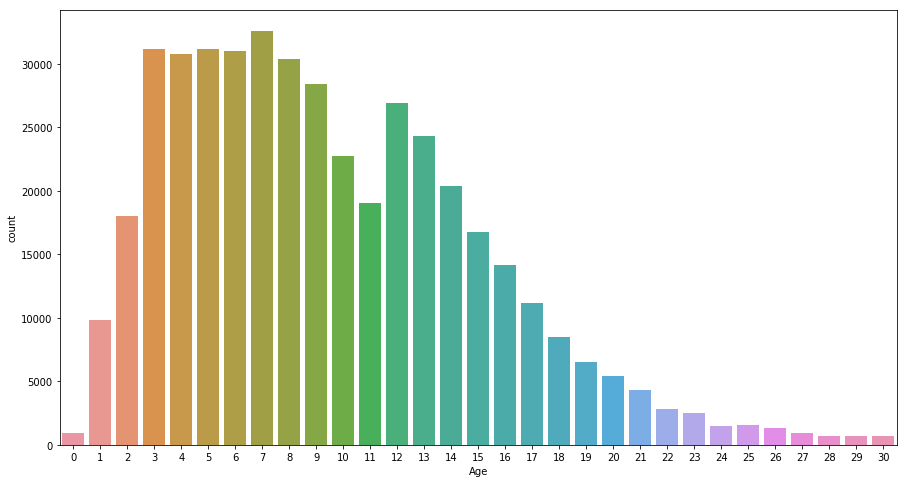

In [41]:
plt.figure(figsize=(15,8))
sns.countplot(cars_true.Age);

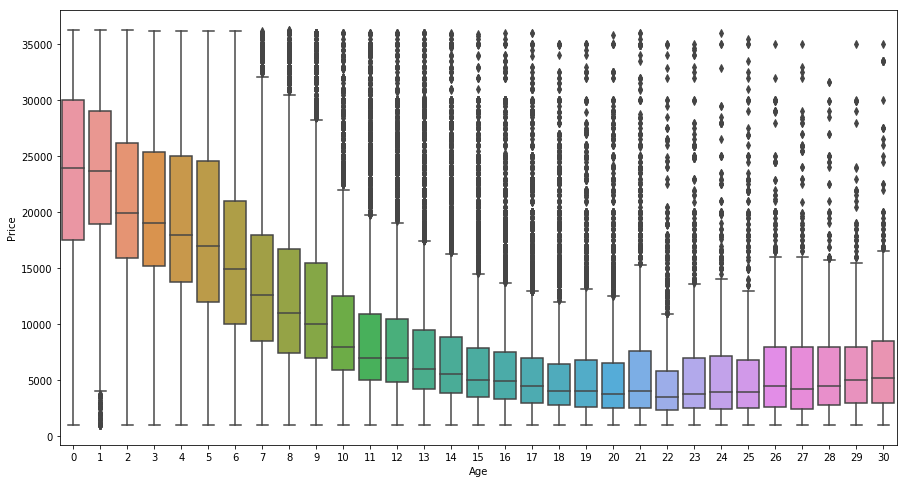

In [42]:
plt.figure(figsize=(15,8))
sns.boxplot(cars_true['Age'],cars_true['Price'])

#### - Year

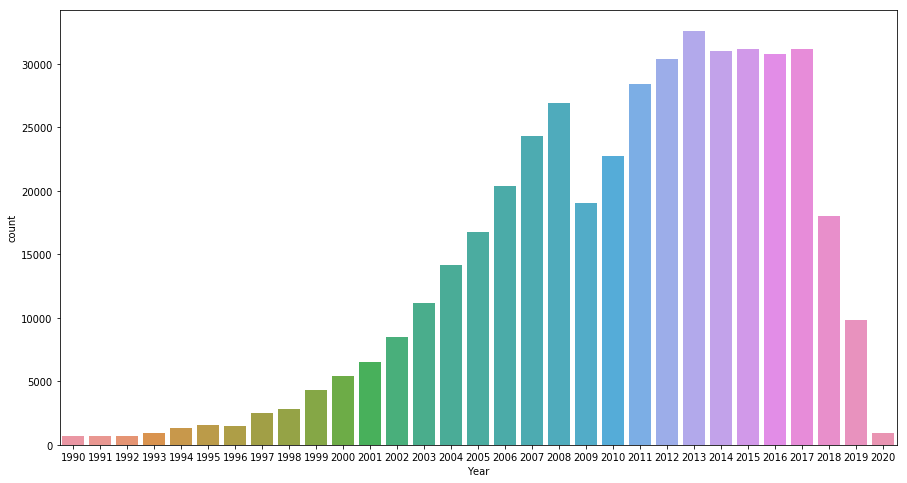

In [43]:
plt.figure(figsize=(15,8))
sns.countplot(cars_true.Year);

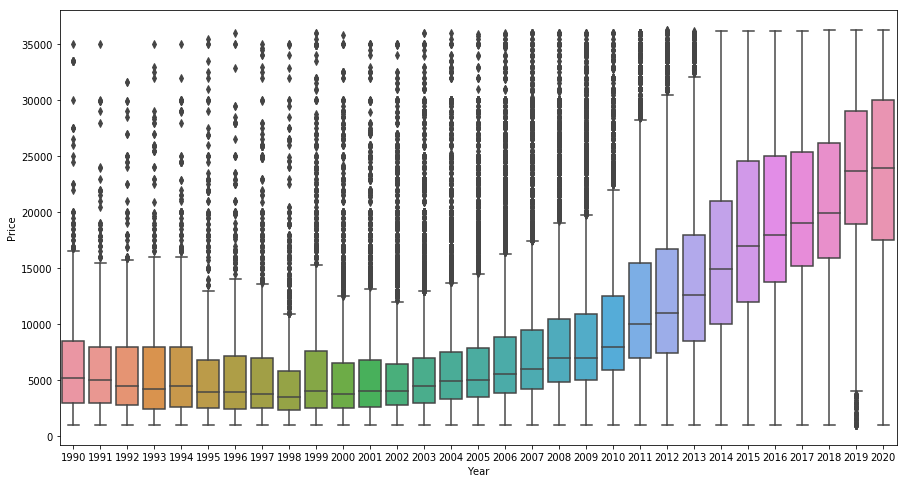

In [44]:
plt.figure(figsize=(15,8))
sns.boxplot(cars_true['Year'],cars_true['Price'])

#### Odometer vs Price by Brand Classify

Text(0.5, 0.98, 'Luxury Cars (Left) versus Regular Cars (Right)')

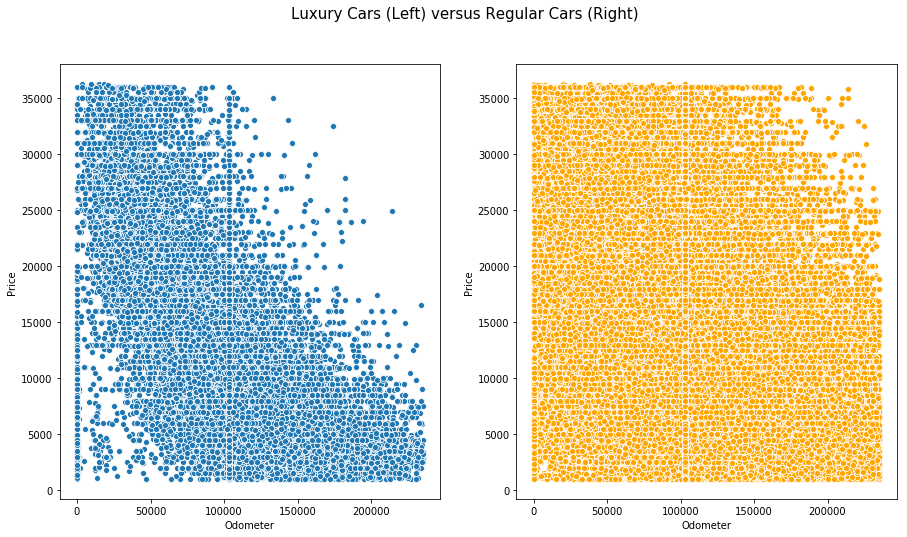

In [45]:
import matplotlib as mpl
df_luxury = cars_true[cars_true['Brand_Classify'] == 'Luxury_cars']
df_regular_cars = cars_true[cars_true['Brand_Classify'] == 'Regular_cars']
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.scatterplot(x='Odometer', y="Price",data=df_luxury)

plt.subplot(1,2,2)
sns.scatterplot(x='Odometer', y="Price",data=df_regular_cars, color='Orange')

plt.suptitle("Luxury Cars (Left) versus Regular Cars (Right)", fontsize = 15)

### B. Categorical Featuers vs Price

#### - Cars Mechanic Characteristics ( Cylender, Fuel, Transmission, Drive, Size and Type)

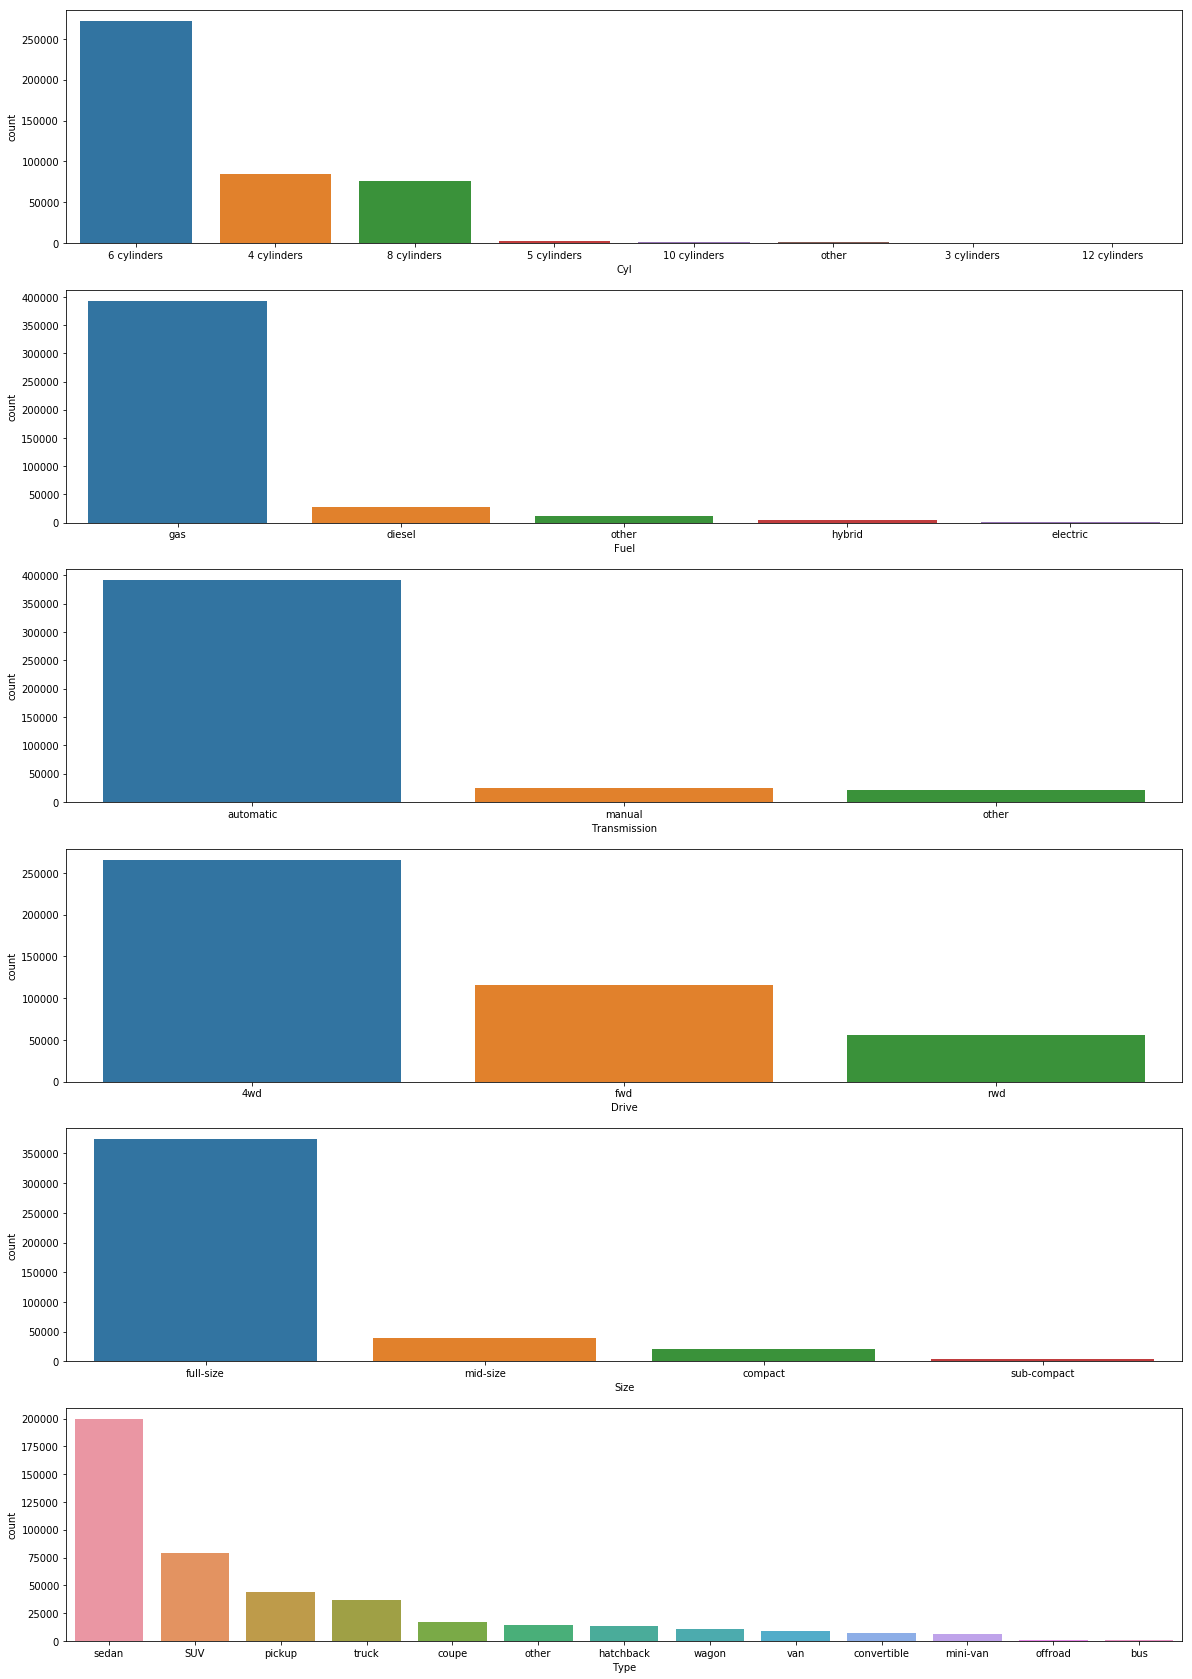

In [46]:
car_mechanic_features =['Cyl','Fuel','Transmission','Drive','Size','Type']

f=plt.figure(figsize=(20,30))
j=1
for i in cars_true[car_mechanic_features]:
    f.add_subplot(6,1,j)
    sns.countplot(cars_true[i],order=cars_true[i].value_counts().index)
    j+=1
plt.show()

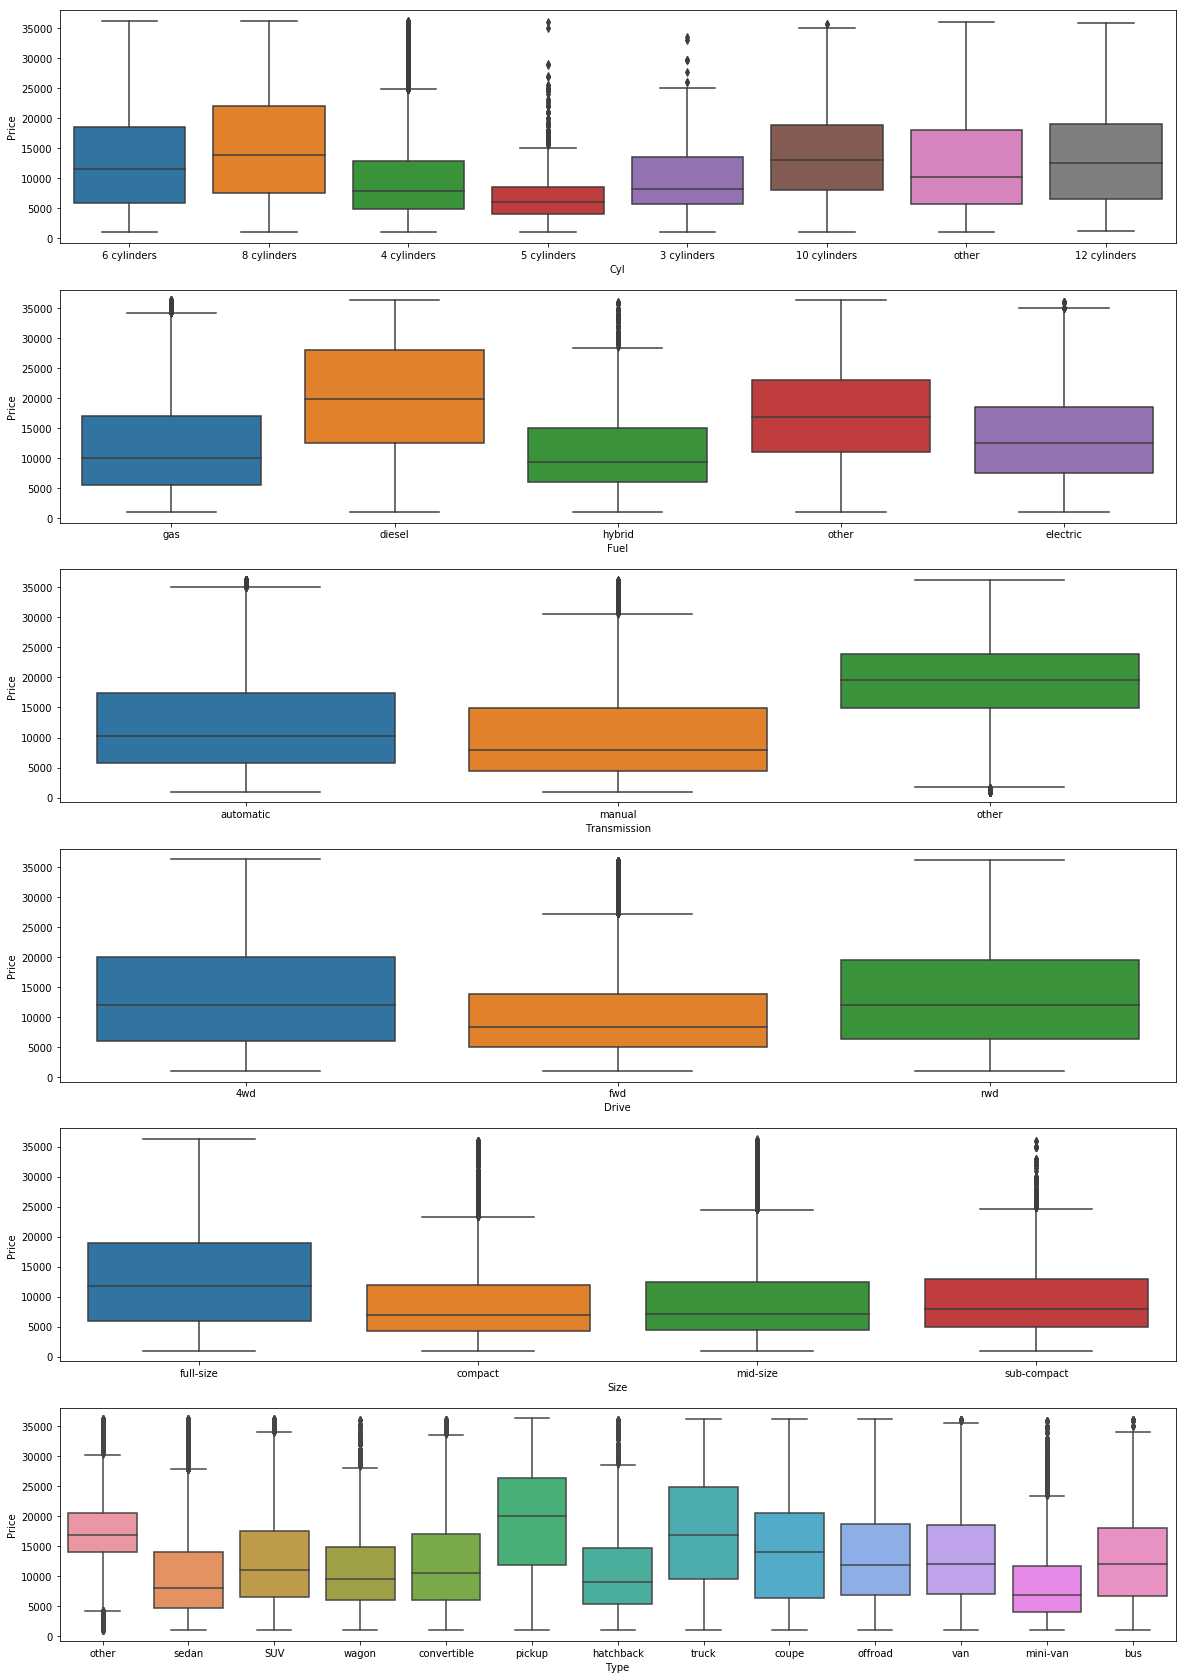

In [47]:
f=plt.figure(figsize=(20,30))
j=1
for i in cars_true[car_mechanic_features]:
    f.add_subplot(6,1,j)
    chart = sns.boxplot(cars_true[i],cars_true['Price'])
    j+=1   
plt.show()

In [48]:
cars_true['Type_size'] =cars_true[['Type', 'Size']].agg('-'.join, axis=1)

C:\Users\hokam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


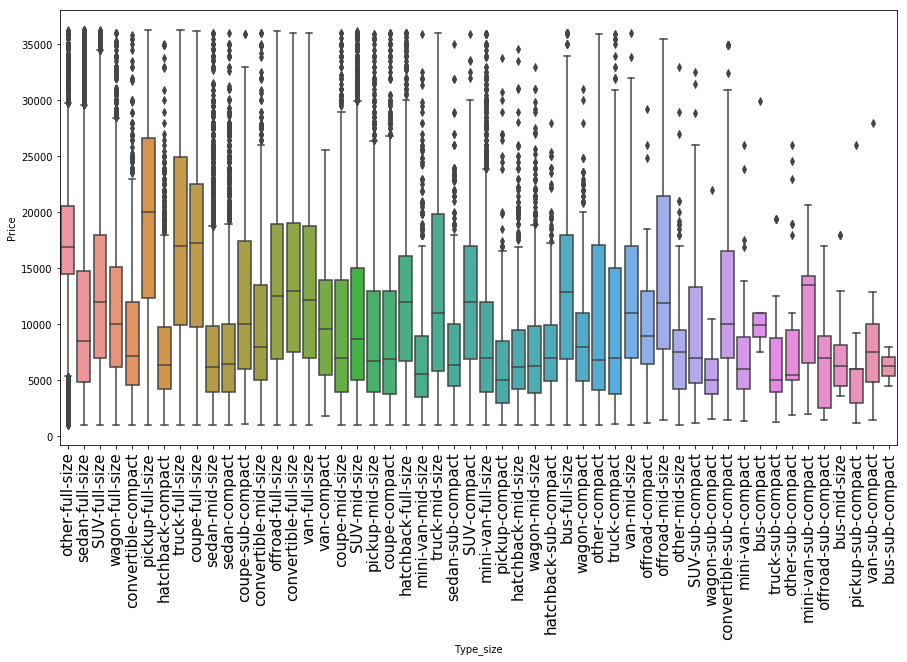

In [49]:
plt.figure(figsize=(15,8))
sns.boxplot(cars_true['Type_size'],cars_true['Price'])
plt.xticks(fontsize=15, rotation=90);

#### - Car Status and Appearance 

In [50]:
#cars_true.columns'Condition''Title_status''Paint_color','Color_Classify'

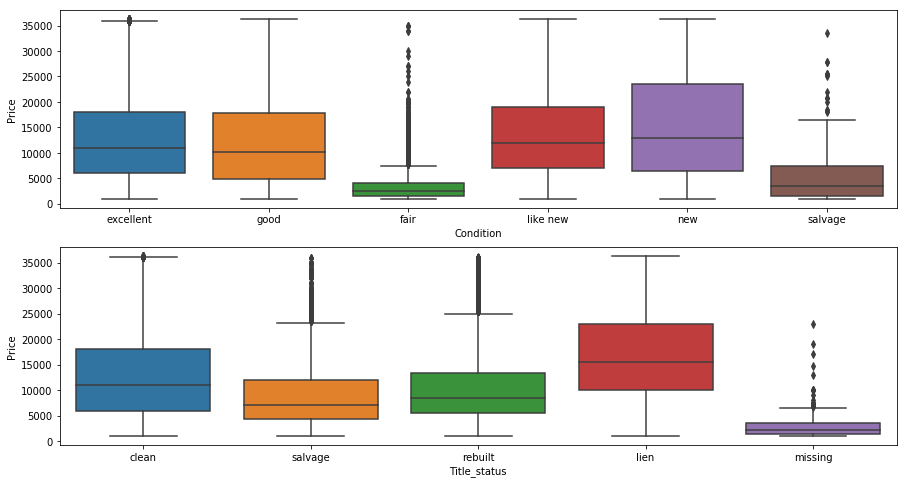

In [51]:
cars_status = ['Condition', 'Title_status']
f=plt.figure(figsize=(15,8))
j=1
for i in cars_true[cars_status]:
    f.add_subplot(2,1,j)
    chart = sns.boxplot(cars_true[i],cars_true['Price'])
    j+=1   
plt.show()

The graph above displays the frequency distributions for cars in the dataset of a certain condition. For persons more concerned about the condition of their vehicles,they will be more likely to consider cars of a new condition, as they would have a more recent year of manufacturing(between 2015-2020). Cars in poor/salvaged condition are most likely depreciated vehicles within the timespan of years 2000-2005. The graph clearly suggests that if you want a vehicle in a great condition, you should purchase a vehicle with a year of manufacturing closest to the most recent year.

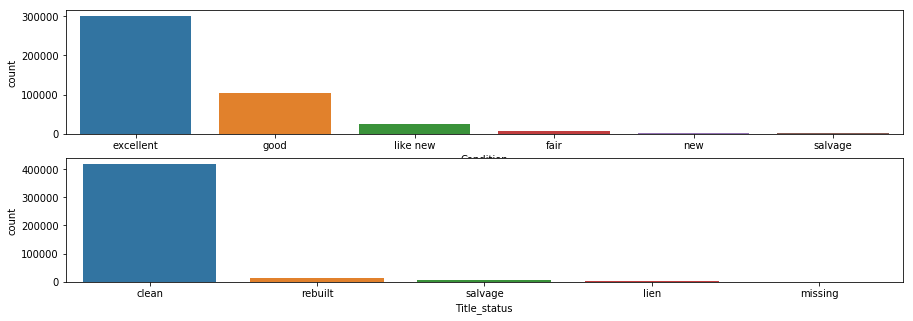

In [52]:
f=plt.figure(figsize=(15,5))
j=1
for i in cars_true[cars_status]:
    f.add_subplot(2,1,j)
    sns.countplot(cars_true[i],order=cars_true[i].value_counts().index)
    j+=1
plt.show()

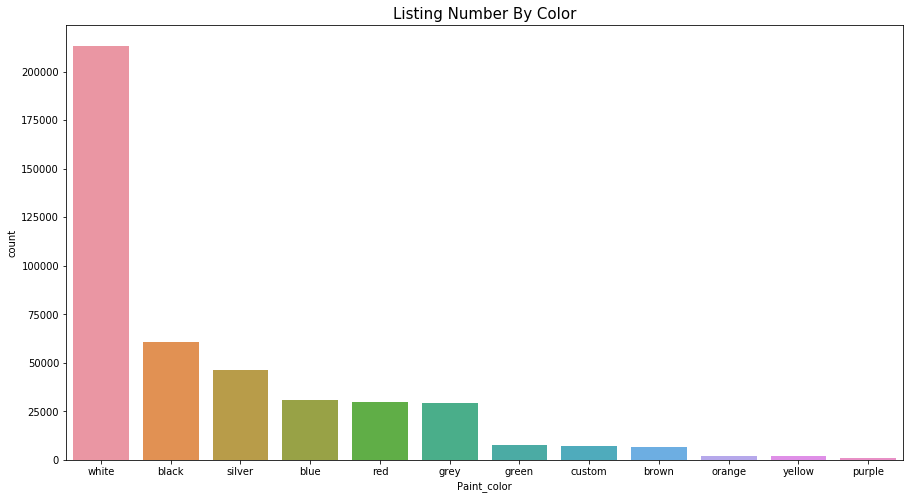

In [53]:
plt.figure(figsize=(15,8))
sns.countplot(cars_true['Paint_color'],order=cars_true['Paint_color'].value_counts().index)
plt.title('Listing Number By Color', fontsize=15)
plt.show()

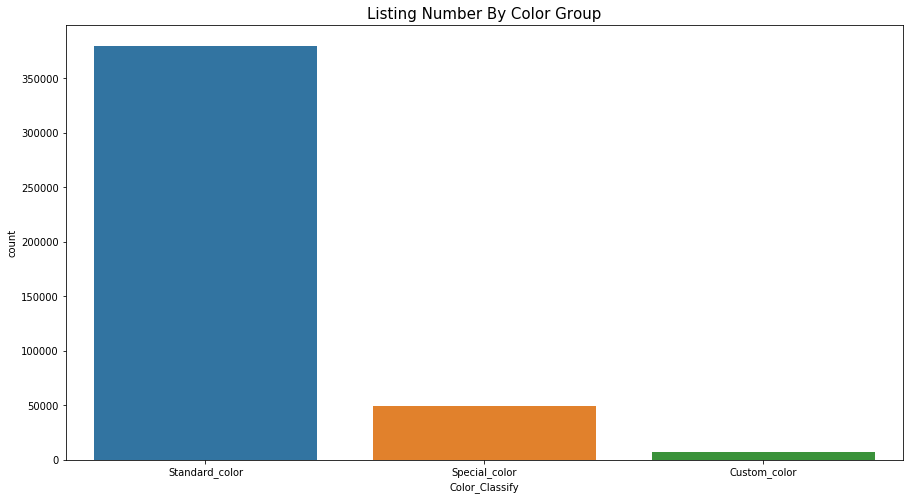

In [54]:
plt.figure(figsize=(15,8))
sns.countplot(cars_true['Color_Classify'],order=cars_true['Color_Classify'].value_counts().index)
plt.title('Listing Number By Color Group', fontsize=15)
plt.show()

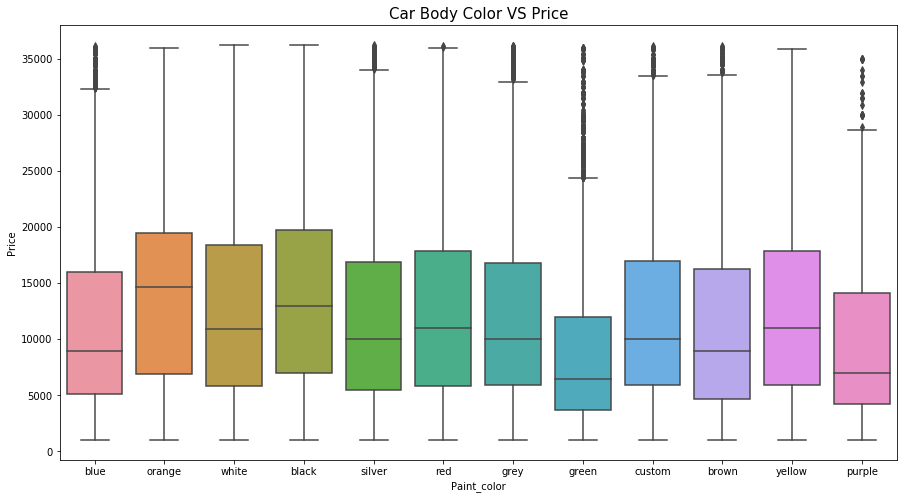

In [55]:
plt.figure(figsize=(15,8))
sns.boxplot(cars_true['Paint_color'],cars_true['Price'])
plt.title('Car Body Color VS Price', fontsize=15)
plt.show()

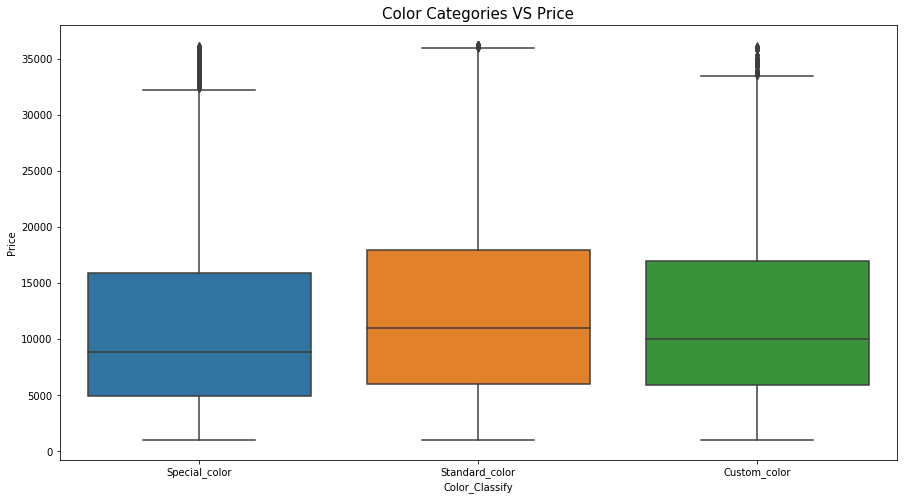

In [56]:
plt.figure(figsize=(15,8))
sns.boxplot(cars_true['Color_Classify'],cars_true['Price'])
plt.title('Color Categories VS Price', fontsize=15)
plt.show()

#### - Listing Number by Location

Here we are looking at the top 10 distribution of cars for sale by state. States such as California, with a population of pproximately 34 million, will generally have more vehicles available for purchase than other states. California has the highest number of vehicles for purchase with less than 160,000 vehicles for sale. States such as Washington will generally have less vehicles available for sale, with a population count of approximately 7 million. Washington has less than 60,000 vehicles available for purchase.

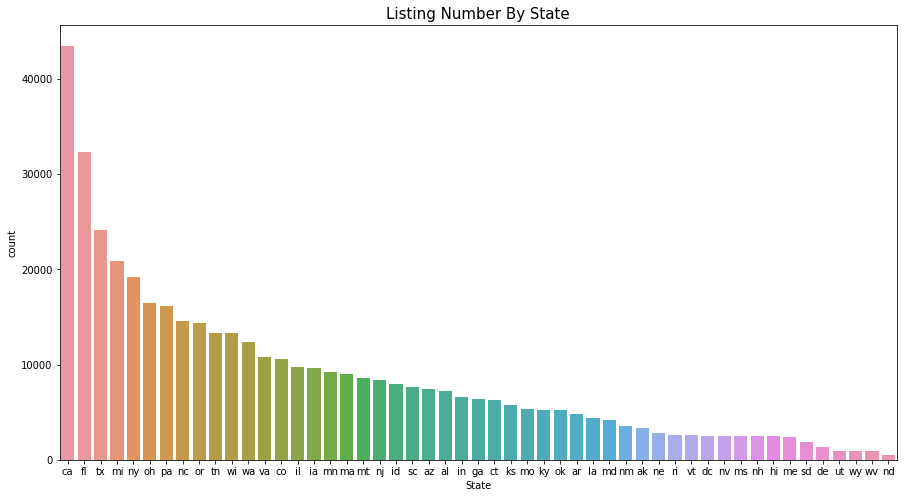

In [57]:
plt.figure(figsize=(15,8))
sns.countplot(cars_true['State'],order=cars_true['State'].value_counts().index)
plt.title('Listing Number By State', fontsize=15)
plt.show()


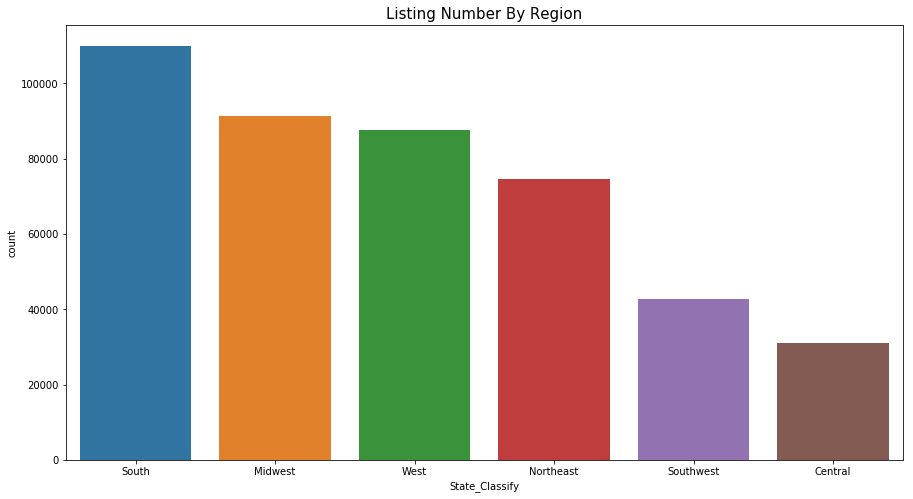

In [58]:
plt.figure(figsize=(15,8))
sns.countplot(cars_true['State_Classify'],order=cars_true['State_Classify'].value_counts().index)
plt.title('Listing Number By Region', fontsize=15)
plt.show()

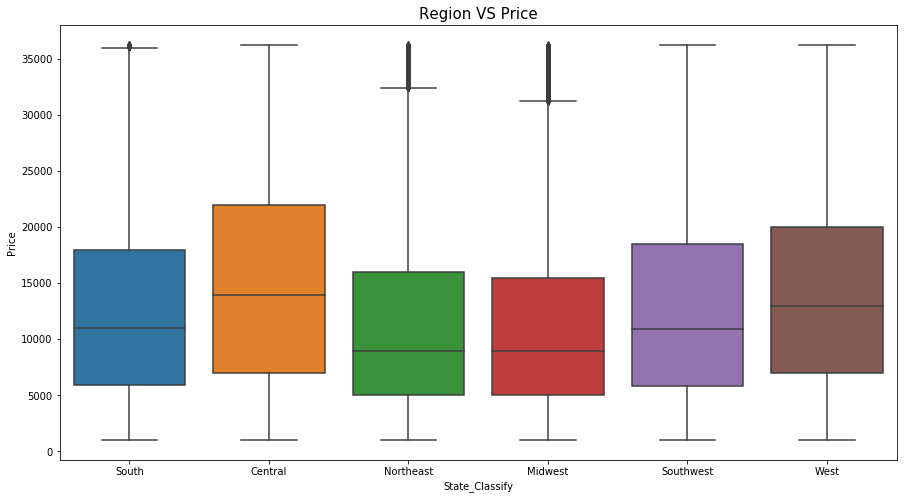

In [59]:
plt.figure(figsize=(15,8))
sns.boxplot(cars_true['State_Classify'],cars_true['Price'])
plt.title('Region VS Price', fontsize=15)
plt.show()

#### - Car Make VS Price

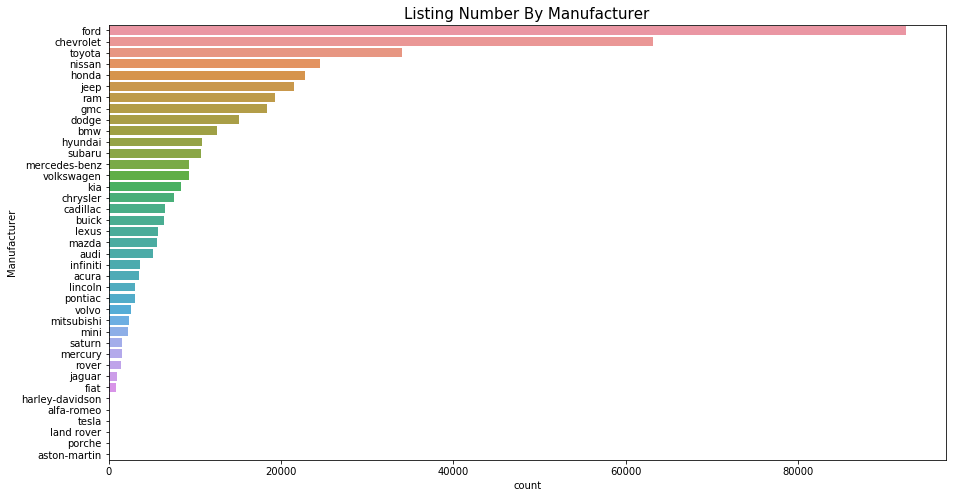

In [60]:
plt.figure(figsize=(15,8))
sns.countplot(y=cars_true['Manufacturer'],order=cars_true['Manufacturer'].value_counts().index)
plt.title('Listing Number By Manufacturer', fontsize=15)
plt.show()

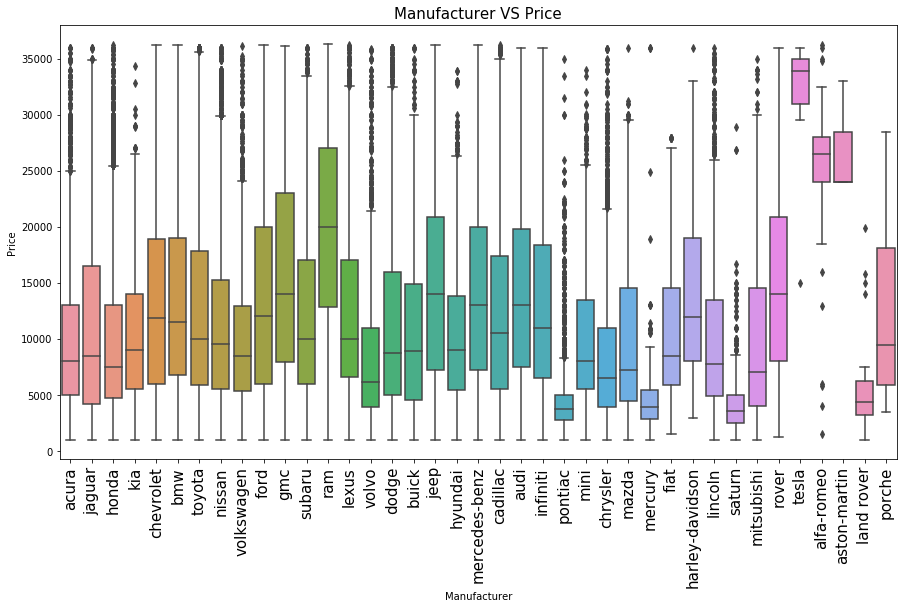

In [61]:
plt.figure(figsize=(15,8))
sns.boxplot(cars_true['Manufacturer'],cars_true['Price'])
plt.xticks(fontsize=15, rotation=90)
plt.title('Manufacturer VS Price', fontsize=15)
plt.show()

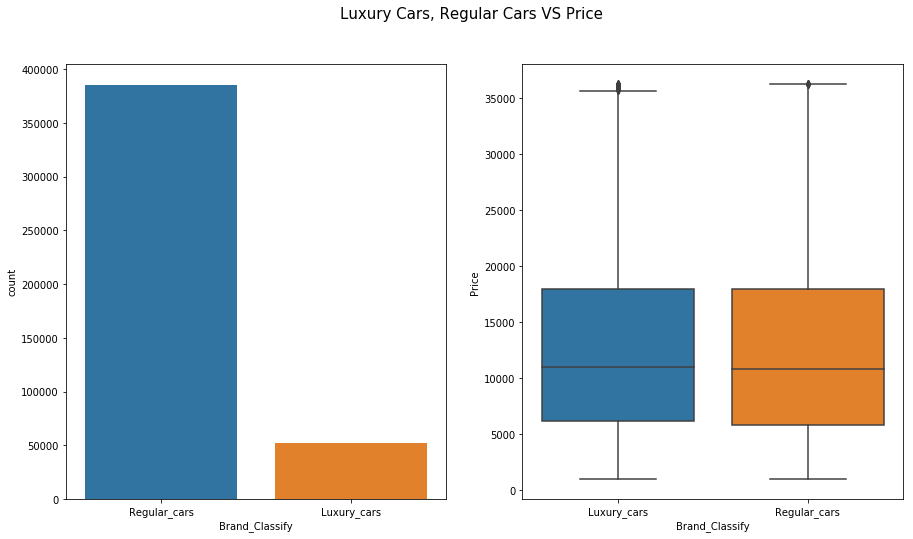

In [62]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(cars_true['Brand_Classify'],order=cars_true['Brand_Classify'].value_counts().index)

plt.subplot(1,2,2)
sns.boxplot(x='Brand_Classify', y="Price",data=cars_true)

plt.suptitle("Luxury Cars, Regular Cars VS Price", fontsize = 15);

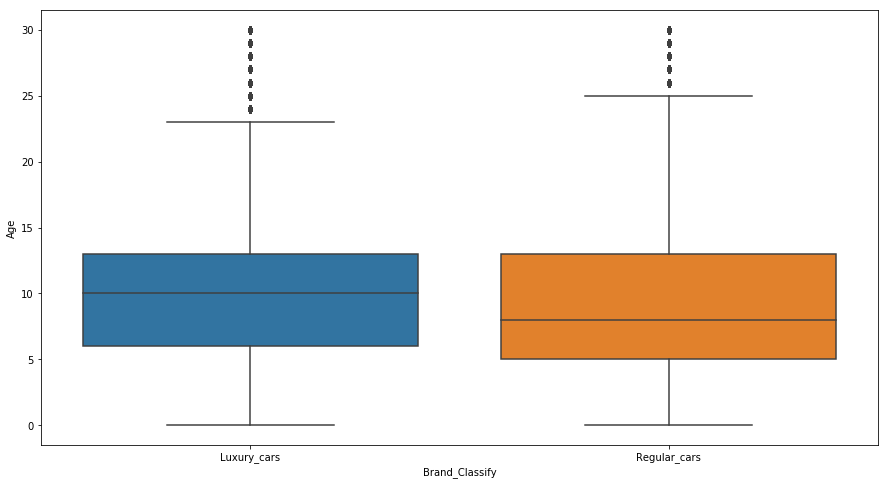

In [63]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Brand_Classify', y="Age",data=cars_true)

In [64]:
#from mpl_toolkits import mplot3d
#fig = plt.figure(figsize=(10,10))
#ax = plt.axes(projection="3d")

#z_points = cars_true['Price']
#x_points = cars_true['Odometer']
#y_points = cars_true['Age']
#ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

#ax.set_xlabel('Odometer')
#ax.set_ylabel('Age')
#ax.set_zlabel('Price')

#plt.show()

## Correlation value of Numerical Feature vs Price

## Get Dummy Variables

In [65]:
dummy_features = ['Condition','Cyl','Fuel',
                  'Title_status','Transmission', 'Drive',
                  'Size','Type','State_Classify','Brand_Classify','Color_Classify' ]

In [66]:
dummies=pd.get_dummies(cars_true[dummy_features],drop_first=True)

In [67]:
type(dummies)

pandas.core.frame.DataFrame

In [68]:
dummies.shape

(437347, 47)

In [121]:
#dummies['Age'] = cars_true['Age'].values
#dummies['Odometer'] = cars_true['Odometer'].values
#dummies['Price'] = cars_true['Price'].values

In [123]:
corr = dummies.corr()

## set up mask to be 'True' in the upper triangle
#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask)] = True

##Plot our correlation heatmap, while masking the upper triangle to be white
#plt.figure(figsize=(15,8))
#with sns.axes_style('white'):
 #   sns.heatmap(corr,mask=mask, cmap=sns.diverging_palette(10, 120, as_cmap=True),linewidths=.1,vmin=0,vmax=1, square=True, annot=True)

#plt.title('Correlation: Price VS All Variables', fontsize=20);

In [125]:
corr.drop('Price', inplace=True)


In [137]:
corr['Price'].sort_values(ascending=False).head(10)

Type_pickup                      0.254519
Transmission_other               0.176279
Size_full-size                   0.174852
Type_truck                       0.162608
Cyl_8 cylinders                  0.141565
State_Classify_West              0.101254
Fuel_other                       0.091701
Type_other                       0.090786
Color_Classify_Standard_color    0.066409
Cyl_6 cylinders                  0.050430
Name: Price, dtype: float64

Text(0.5, 1.0, 'Positive Correlation Ranking: Price VS Top 10 Variables')

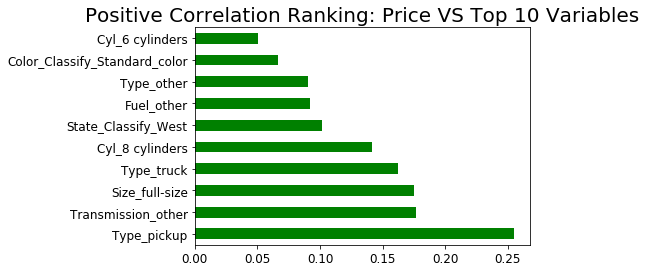

In [153]:
corr['Price'].sort_values(ascending=False).head(10).plot(kind='barh', color="g", fontsize=12)
plt.grid(False)
plt.title('Positive Correlation Ranking: Price VS Top 10 Variables', fontsize=20)

In [138]:
corr['Price'].sort_values(ascending=False).tail(10)

State_Classify_Northeast   -0.070986
State_Classify_Midwest     -0.090089
Condition_fair             -0.124318
Size_mid-size              -0.127886
Cyl_4 cylinders            -0.188850
Drive_fwd                  -0.211680
Fuel_gas                   -0.232111
Type_sedan                 -0.260615
Odometer                   -0.485568
Age                        -0.595026
Name: Price, dtype: float64

Text(0.5, 1.0, 'Negative Correlation Ranking: Price VS Top 10 Variables')

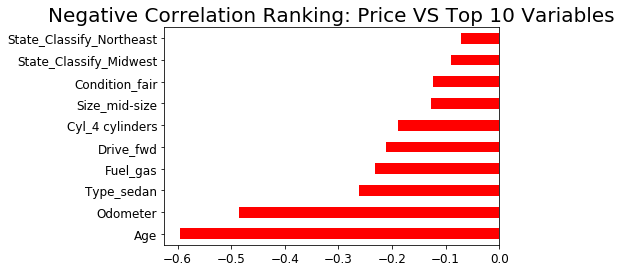

In [151]:
corr['Price'].sort_values().head(10).plot(kind='barh', color="r", fontsize=12)
plt.grid(False)
plt.title('Negative Correlation Ranking: Price VS Top 10 Variables', fontsize=20)

In [72]:
#mask1 = np.zeros_like(df_corr.iloc[:,:25].corr())
#mask2 = np.zeros_like(df_corr.iloc[:,25:].corr())
#sns.heatmap(df_corr.iloc[:,:25].corr(),mask=mask1, cmap=sns.diverging_palette(10, 120, as_cmap=True),linewidths=.1,vmin=0,vmax=1, square=True, annot=True)
#sns.heatmap(df_corr.iloc[:,25:].corr(),mask=mask2, cmap=sns.diverging_palette(10, 120, as_cmap=True),linewidths=.1,vmin=0,vmax=1, square=True, annot=True)

In [73]:
numerical_feature.pop(0)

'ID'

In [74]:
numerical_feature.append('Age')

In [75]:
numerical_feature.pop(1)

'Year'

In [76]:
numerical_feature

['Price', 'Odometer', 'Age']

In [77]:
cars_true_dummies=pd.concat([cars_true,dummies],axis=1)

In [78]:
filt1 = ['Odometer','Age']
feature = filt1 + dummies.columns.tolist()
y=cars_true_dummies['Price']
dependent_features = cars_true_dummies[feature] 

model=sm.OLS(y,dependent_features).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                 6.676e+04
Date:                Thu, 16 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:35:17   Log-Likelihood:            -4.3643e+06
No. Observations:              437347   AIC:                         8.729e+06
Df Residuals:                  437298   BIC:                         8.729e+06
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Odometer      

In [79]:
p=model.pvalues<0.05

print("{:2.2f} percent of variables are statistically significant".format(sum(p)*100/len(p)))
print("-------------------------------------------------------------\n")
      
print("List of statistically significant variables at 95% confidence level: {} ".format(p[p].index.tolist()),flush=True)


95.92 percent of variables are statistically significant
-------------------------------------------------------------

List of statistically significant variables at 95% confidence level: ['Odometer', 'Age', 'Condition_fair', 'Condition_good', 'Condition_salvage', 'Cyl_12 cylinders', 'Cyl_3 cylinders', 'Cyl_4 cylinders', 'Cyl_5 cylinders', 'Cyl_6 cylinders', 'Cyl_8 cylinders', 'Cyl_other', 'Fuel_electric', 'Fuel_gas', 'Fuel_hybrid', 'Fuel_other', 'Title_status_lien', 'Title_status_missing', 'Title_status_rebuilt', 'Title_status_salvage', 'Transmission_manual', 'Transmission_other', 'Drive_fwd', 'Drive_rwd', 'Size_full-size', 'Size_mid-size', 'Size_sub-compact', 'Type_bus', 'Type_convertible', 'Type_coupe', 'Type_hatchback', 'Type_mini-van', 'Type_offroad', 'Type_other', 'Type_pickup', 'Type_sedan', 'Type_truck', 'Type_van', 'Type_wagon', 'State_Classify_Midwest', 'State_Classify_Northeast', 'State_Classify_South', 'State_Classify_Southwest', 'State_Classify_West', 'Brand_Classify_Regu

In [80]:
cars_price_pred = model.predict(dependent_features)

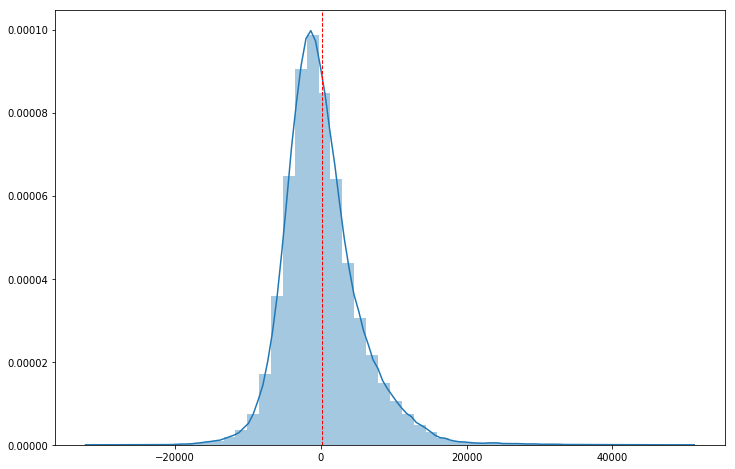

In [117]:
plt.figure(figsize=(12,8))
residuals = cars_true['Price'] - cars_price_pred
sns.distplot(residuals)
plt.axvline(residuals.mean(), color='r', linestyle="--", linewidth=1)

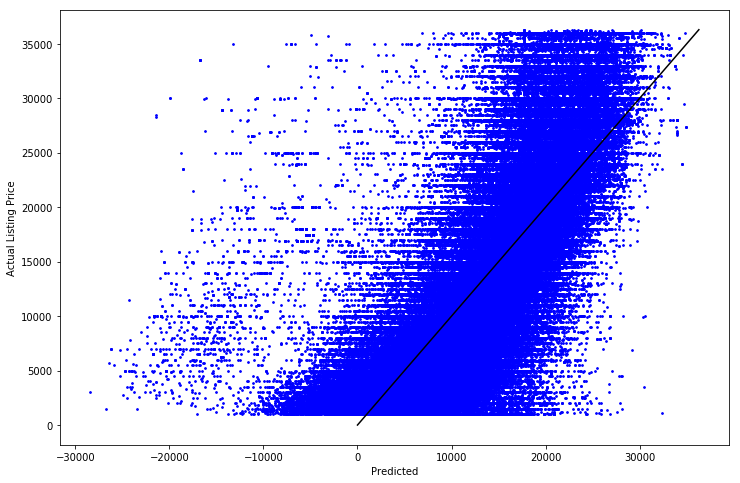

In [113]:
plt.figure(figsize=(12,8))
plt.scatter(cars_price_pred, y, s=3, c='blue')
plt.xlabel('Predicted')
plt.ylabel('Actual Listing Price')

plt.plot([0,np.max(y)],[0,np.max(y)], c='k')

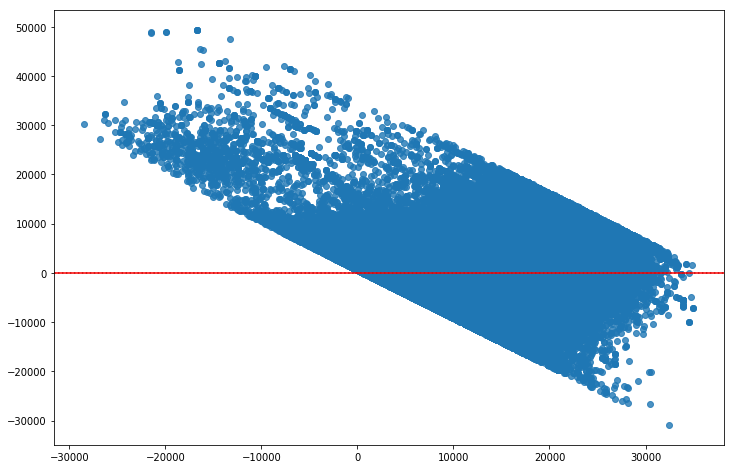

In [114]:
plt.figure(figsize=(12,8))
sns.residplot(x=cars_price_pred, y=residuals)
plt.axhline(0,color='r')

In [86]:
from sklearn.linear_model import LinearRegression

In [92]:
y1=cars_true_dummies['Price']
dependent_features1 = cars_true_dummies[feature] 

In [93]:
model1= LinearRegression()

In [94]:
model1.fit(dependent_features1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [95]:
cars_price_pred1 = model1.predict(dependent_features1)

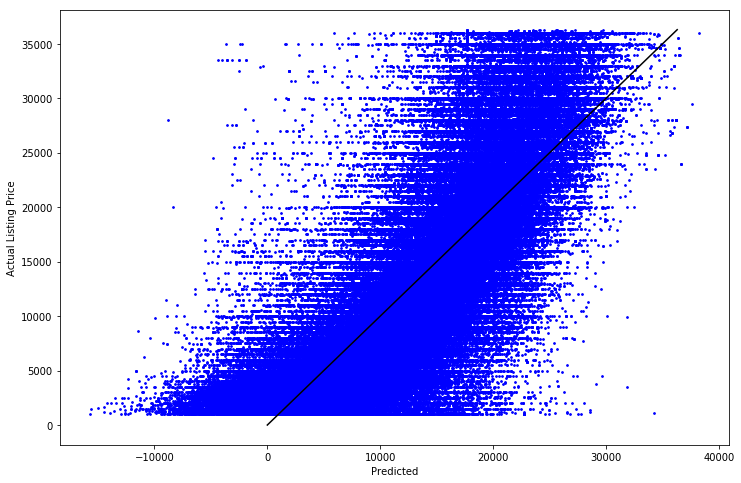

In [115]:
plt.figure(figsize=(12,8))
plt.scatter(cars_price_pred1, y1, s=3, c='blue')
plt.xlabel('Predicted')
plt.ylabel('Actual Listing Price')

plt.plot([0,np.max(y1)],[0,np.max(y1)], c='k')

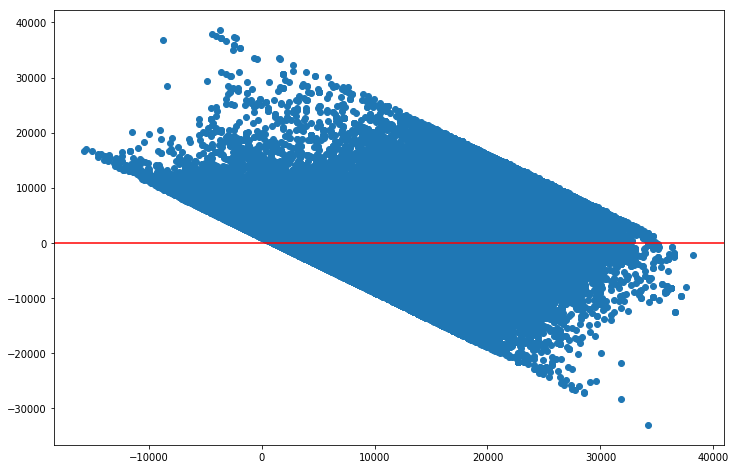

In [116]:
plt.figure(figsize=(12,8))
residual1 = y1-cars_price_pred1
plt.scatter(cars_price_pred1, residual1)
plt.axhline(0, color='r')

In [103]:
from sklearn import metrics

In [110]:
def cars_MLR_metrics(y_true, y_pred):
    mse = metrics.mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    
    print('Mean squared error      = ', mse)
    print('Root mean squared error = ', rmse)
    print('Median absolute error   = ', mae)
    print('R^2                     = ', r2)

In [111]:
cars_MLR_metrics(y1,cars_price_pred1)

Mean squared error      =  23674344.196957592
Root mean squared error =  4865.628859351851
Median absolute error   =  2851.6946807342792
R^2                     =  0.6636419225032385
